In [9]:
import pandas as pd 
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings

In [10]:
# Using set_option function to display the needed no. of rows and columns
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',800)
# To ignore warnings
warnings.simplefilter('ignore')

### Perform the following steps:

#### Understand the dataset:
##### Identify the shape of the dataset
##### Identify variables with null values

In [11]:
# Task 1
# import 311 NYC Service Request
df= pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [12]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,...,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [14]:
# Understand teh dataset
df.shape

(364558, 53)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [16]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [20]:
# Create new dataset with necessary columns
nyc_ds= df[['Unique Key','Created Date','Closed Date','Agency','Agency Name','Complaint Type','Descriptor','Location Type' ,'Incident Zip','Incident Address','Street Name','Cross Street 1','Cross Street 2','Address Type','City','Status','Due Date' ,'Resolution Description','Resolution Action Updated Date','Community Board','Borough','X Coordinate (State Plane)' ,'Y Coordinate (State Plane)','Park Borough','Latitude','Longitude','Location']]
nyc_ds

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,1/1/2015 0:04,1/1/2015 10:22,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,WOODHAVEN,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 10:22,09 QUEENS,QUEENS,1022809.0,192567.0,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,1/1/2015 0:04,1/1/2015 2:25,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,BRONX,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 2:25,07 BRONX,BRONX,1009923.0,255465.0,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,1/1/2015 0:01,1/1/2015 0:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,NEW YORK,Closed,1/1/2015 8:01,The Police Department responded to the complai...,1/1/2015 0:20,09 MANHATTAN,MANHATTAN,997847.0,238629.0,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,1/1/2015 0:01,1/1/2015 2:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,ADDRESS,BRONX,Closed,1/1/2015 8:01,The Police Department responded and 

In [21]:
# City Names are mixed as some names are lowercase and some UpperCase.
# We will convert all city names to Camel case using below defined function.

# fix city names
def camel_case(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        if city == 'Unknown':
            return np.nan
        else:
            return city
    except:
        return np.nan
    
# Apply camel_case function to City column
nyc_ds['City'] =nyc_ds['City'].apply(camel_case)
nyc_ds['City'].value_counts()

Brooklyn               118862
New York                77312
Bronx                   49171
Staten Island           15340
Jamaica                  8932
Astoria                  8897
Flushing                 7487
Ridgewood                6392
Corona                   5383
Woodside                 4523
East Elmhurst            3588
Ozone Park               3446
Elmhurst                 3438
South Richmond Hill      3431
Long Island City         3198
Maspeth                  3118
Woodhaven                3103
South Ozone Park         2668
Fresh Meadows            2453
Richmond Hill            2335
Middle Village           2291
Queens Village           2251
Forest Hills             2122
Jackson Heights          2106
Rego Park                1807
Bayside                  1550
College Point            1544
Far Rockaway             1397
Whitestone               1369
Hollis                   1231
Howard Beach             1145
Springfield Gardens      1094
Rosedale                 1091
Saint Alba

In [24]:
# Identify variables with null values
nyc_ds.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Borough                          0
Latitude                           4030


### 2. Perform basic data exploratory analysis:
#### 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame
#### 2.2 Missing value treatment
##### 2.2.1 Remove the records whose Closed Date values are null
#### 2.3 Analyze the date column, and remove entries that have an incorrect timeline
##### 2.3.1 Calculate the time elapsed in closed and creation date
##### 2.3.2 Convert the calculated date to seconds to get a better representation
##### 2.3.3 View the descriptive statistics for the newly created column
##### 2.3.4 Check the number of null values in the Complaint_Type and City columns
##### 2.3.5 Impute the NA value with Unknown City
##### 2.3.6 Draw a frequency plot for the complaints in each city
##### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn


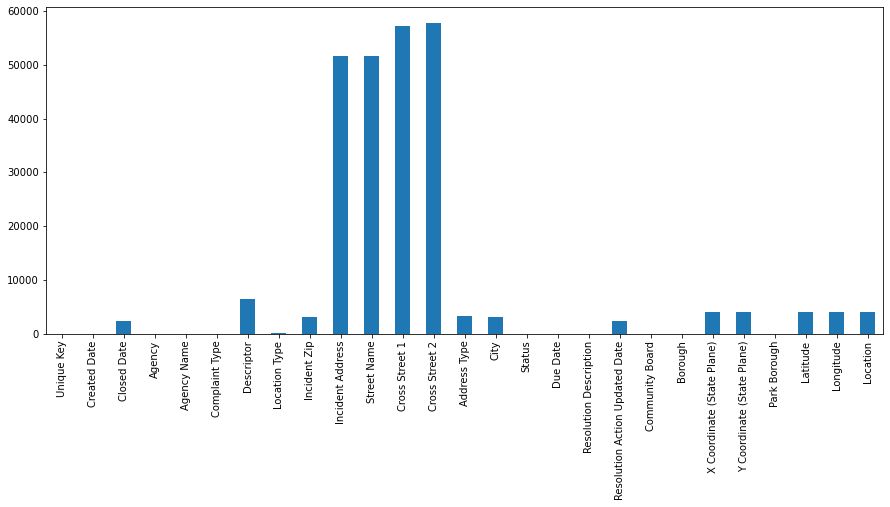

In [25]:
# 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame
plt.figure(figsize=(15,6))
nyc_ds.isnull().sum().plot.bar()
plt.show()

In [44]:
# 2.2 Missing value treatment
nyc_ds['Created Date'].isnull().sum()  #checking missing values in date columns

0

In [46]:
# 2.2 Missing value treatment
nyc_ds['Closed Date'].isnull().sum()   #checking missing values in Closed Date columns

0

In [48]:
# 2.2 Missing value treatment
nyc_ds.loc[nyc_ds['Closed Date'].isnull()]   #locating all null entries in 'Closed Date' column

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed,Time Elapsed in Seconds


In [49]:

# Display data whose Closed Date values are null
## 2.2.1 Remove the records whose Closed Date values are null
nyc_ds.dropna(subset=['Closed Date'], how='all', inplace=True)

In [29]:
nyc_ds
nyc_ds.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                           0
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6496
Location Type                       130
Incident Zip                        675
Incident Address                  51686
Street Name                       51686
Cross Street 1                    55331
Cross Street 2                    55464
Address Type                        929
City                                674
Status                                0
Due Date                              1
Resolution Description                0
Resolution Action Updated Date       39
Community Board                       0
Borough                               0
X Coordinate (State Plane)         1707
Y Coordinate (State Plane)         1707
Park Borough                          0
Latitude                           1707


In [32]:
# 2.3 Analyze the date column, and remove entries that have an incorrect timeline
# 2.3.1 Calculate the time elapsed in closed and creation date
nyc_ds['Closed Date'] = pd.to_datetime(nyc_ds['Closed Date'], errors='coerce')
nyc_ds['Created Date'] = pd.to_datetime(nyc_ds['Created Date'], errors='coerce')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,New York,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,Astoria,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,Bronx,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,Bronx,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,Elmhurst,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:00,2015-01-01 10:22:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,Woodhaven,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 10:22,09 QUEENS,QUEENS,1022809.0,192567.0,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,2015-01-01 00:04:00,2015-01-01 02:25:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,Bronx,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 2:25,07 BRONX,BRONX,1009923.0,255465.0,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,2015-01-01 00:01:00,2015-01-01 00:20:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,New York,Closed,1/1/2015 8:01,The Police Department responded to the complai...,1/1/2015 0:20,09 MANHATTAN,MANHATTAN,997847.0,238629.0,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,2015-01-01 00:01:00,2015-01-01 02:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AV

In [51]:
nyc_ds.head(5) # cleaned dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed,Time Elapsed in Seconds
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,New York,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,3360.0
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,Astoria,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,5220.0
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,Bronx,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,17520.0
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,Bronx,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,27960.0
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,Elmhurst,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,12480.0


In [34]:
# 2.3.1 Calculate the time elapsed in closed and creation date
nyc_ds['Closed Date'] = pd.to_datetime(nyc_ds['Closed Date'], errors='coerce')
nyc_ds['Created Date'] = pd.to_datetime(nyc_ds['Created Date'], errors='coerce')
nyc_ds['Time Elapsed'] = nyc_ds['Closed Date'] - nyc_ds['Created Date']
nyc_ds

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,New York,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,Astoria,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,Bronx,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,Bronx,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,Elmhurst,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:00,2015-01-01 10:22:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,Woodhaven,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 10:22,09 QUEENS,QUEENS,1022809.0,192567.0,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:18:00
364554,29608392,2015-01-01 00:04:00,2015-01-01 02:25:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,Bronx,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 2:25,07 BRONX,BRONX,1009923.0,255465.0,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:21:00
364555,29607589,2015-01-01 00:01:00,2015-01-01 00:20:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,New York,Closed,1/1/2015 8:01,The Police Department responded to the complai...,1/1/2015 0:20,09 MANHATTAN,MANHATTAN,997847.0,238629.0,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",0 days 00:19:00
364556,29610889,2015-01-01 00:01:00,2015-01-01 

In [35]:
# 2.3.2 Convert the calculated date to seconds to get a better representation
nyc_ds['Time Elapsed in Seconds'] = (nyc_ds['Closed Date'] - nyc_ds['Created Date']).dt.total_seconds()
nyc_ds

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed,Time Elapsed in Seconds
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,New York,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,3360.0
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,Astoria,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,5220.0
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,Bronx,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,17520.0
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,Bronx,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,27960.0
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,Elmhurst,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,12480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:00,2015-01-01 10:22:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,Woodhaven,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 10:22,09 QUEENS,QUEENS,1022809.0,192567.0,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:18:00,37080.0
364554,29608392,2015-01-01 00:04:00,2015-01-01 02:25:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,Bronx,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 2:25,07 BRONX,BRONX,1009923.0,255465.0,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:21:00,8460.0
364555,29607589,2015-01-01 00:01:00,2015-01-01 00:20:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,New York,Closed,1/1/2015 8:01,The Police Department responded to the complai...,1/1/2015 0:20,09 MANHATTAN,MANHATTAN,997847.0,238629.0,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73

In [38]:
# Display 'Time Elapsed' and 'Time Elapsed in Seconds'
nyc_ds[['Time Elapsed', 'Time Elapsed in Seconds']].describe()

,Time Elapsed,Time Elapsed in Seconds
count,362177,3.621770e+05
mean,0 days 04:11:53.264232681,1.511326e+04
std,0 days 05:51:42.535098736,2.110254e+04
min,0 days 00:01:00,6.000000e+01
25%,0 days 01:16:00,4.560000e+03
50%,0 days 02:40:00,9.600000e+03
75%,0 days 05:15:00,1.890000e+04
max,24 days 16:53:00,2.134380e+06


In [39]:
# Display Statistics
nyc_ds.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Time Elapsed,Time Elapsed in Seconds
count,3.621770e+05,361502.000000,3.604700e+05,360470.000000,360470.000000,360470.000000,362177,3.621770e+05
mean,3.106545e+07,10858.533377,1.005044e+06,203424.740428,40.724978,-73.924942,0 days 04:11:53.264232681,1.511326e+04
std,7.337572e+05,578.254027,2.196323e+04,29842.548376,0.081908,0.079212,0 days 05:51:42.535098736,2.110254e+04
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,40.499040,-74.254937,0 days 00:01:00,6.000000e+01
25%,3.049763e+07,10314.000000,9.919460e+05,182945.000000,40.668741,-73.972248,0 days 01:16:00,4.560000e+03
50%,3.108661e+07,11209.000000,1.003470e+06,201023.000000,40.718398,-73.930630,0 days 02:40:00,9.600000e+03
75%,3.167497e+07,11238.000000,1.019135e+06,222790.000000,40.778160,-73.874098,0 days 05:15:00,1.890000e+04
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,40.912869,-73.700715,24 days 16:53:00,2.134380e+06


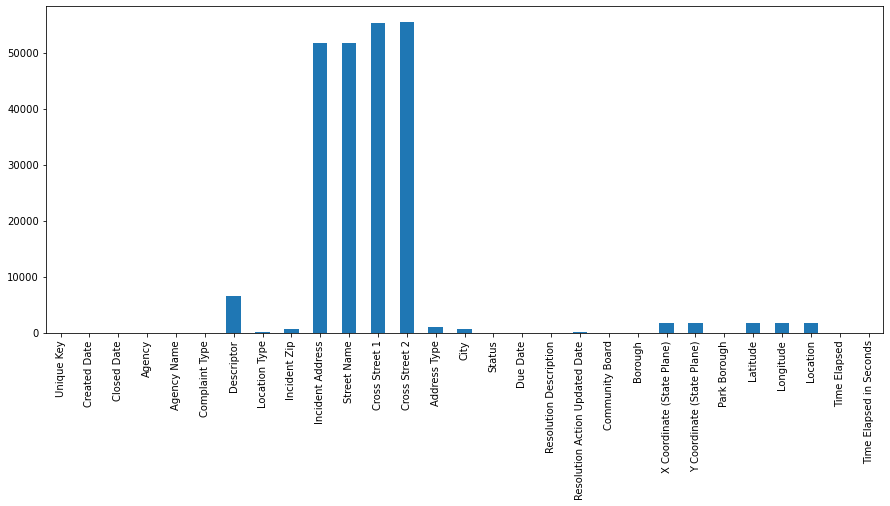

In [40]:
# 2.3.3 View the descriptive statistics for the newly created column
plt.figure(figsize=(15,6))
nyc_ds.isnull().sum().plot.bar()
plt.show()

In [41]:
# 2.3.4 Check the number of null values in the Complaint_Type and City columns
pd.DataFrame(nyc_ds,columns=['Complaint Type','City']).isna().sum()

Complaint Type      0
City              674
dtype: int64

In [43]:
# 2.3.5 Impute the NA value with Unknown City
nyc_ds['City'].fillna('Unknown City', inplace=True)
nyc_ds

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed,Time Elapsed in Seconds
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,New York,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,3360.0
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,Astoria,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,5220.0
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,Bronx,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,17520.0
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,Bronx,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,27960.0
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,Elmhurst,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,12480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:00,2015-01-01 10:22:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,Woodhaven,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 10:22,09 QUEENS,QUEENS,1022809.0,192567.0,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:18:00,37080.0
364554,29608392,2015-01-01 00:04:00,2015-01-01 02:25:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,Bronx,Closed,1/1/2015 8:04,The Police Department responded to the complai...,1/1/2015 2:25,07 BRONX,BRONX,1009923.0,255465.0,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:21:00,8460.0
364555,29607589,2015-01-01 00:01:00,2015-01-01 00:20:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,New York,Closed,1/1/2015 8:01,The Police Department responded to the complai...,1/1/2015 0:20,09 MANHATTAN,MANHATTAN,997847.0,238629.0,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73

In [52]:
pd.DataFrame(nyc_ds,columns=['Complaint Type','City']).isna().sum() # Check the number of null values in the Complaint_Type and City columns

Complaint Type    0
City              0
dtype: int64

In [53]:
# Display the complaint type and city together
nyc_ds[['Complaint Type', 'City']].head()

,Complaint Type,City
0,Noise - Street/Sidewalk,New York
1,Blocked Driveway,Astoria
2,Blocked Driveway,Bronx
3,Illegal Parking,Bronx
4,Illegal Parking,Elmhurst


In [56]:
nyc_ds['City'].value_counts()  #citywise total complaints

Brooklyn               118849
New York                77289
Bronx                   49166
Staten Island           15335
Jamaica                  8930
Astoria                  8896
Flushing                 7486
Ridgewood                6391
Corona                   5383
Woodside                 4523
East Elmhurst            3587
Ozone Park               3446
Elmhurst                 3438
South Richmond Hill      3431
Long Island City         3197
Maspeth                  3117
Woodhaven                3102
South Ozone Park         2668
Fresh Meadows            2453
Richmond Hill            2333
Middle Village           2291
Queens Village           2251
Forest Hills             2122
Jackson Heights          2105
Rego Park                1807
Bayside                  1550
College Point            1544
Far Rockaway             1397
Whitestone               1369
Hollis                   1231
Howard Beach             1145
Springfield Gardens      1094
Rosedale                 1091
Saint Alba

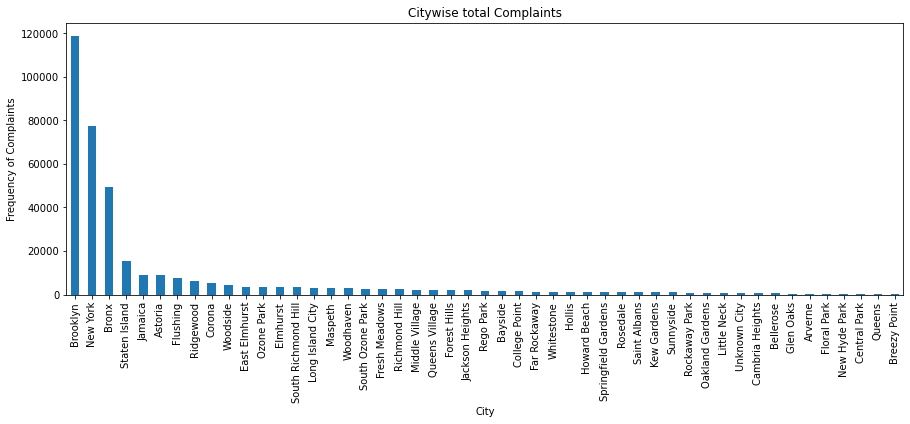

In [61]:
#Frequency plot for city-wise complaints

plt.figure(figsize=(15,5))
nyc_ds['City'].value_counts().plot(kind='bar',title='Citywise total Complaints', xlabel='City', ylabel='Frequency of Complaints')
plt.show()

### <p style="text-align:center; text-width:bold">Brooklyn City records highest number of complaints followed by New York city</p>

<AxesSubplot:title={'center':'Top 10 Citywise Complaints'}, xlabel='City', ylabel='Frequency of Complaints'>

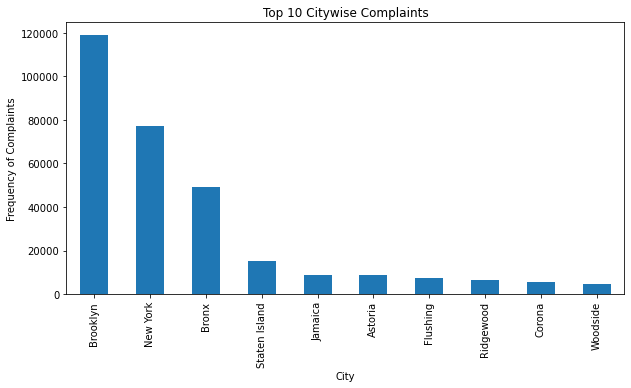

In [126]:
#Top 10 City-wise Complaints

plt.figure(figsize=(10,5))
nyc_ds['City'].value_counts().head(10).plot(kind='bar',title='Top 10 Citywise Complaints', xlabel='City', ylabel='Frequency of Complaints')

In [71]:
#Analyzing data for City Brooklyn

Brooklyn_ds = nyc_ds[nyc_ds['City']=='Brooklyn']
Brooklyn_ds.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed,Time Elapsed in Seconds
5,32306554,2015-12-31 23:56:00,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,6 AVENUE,ADDRESS,Brooklyn,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 1:50,07 BROOKLYN,BROOKLYN,986312.0,180032.0,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:54:00,6840.0
9,32308391,2015-12-31 23:53:00,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,NEW UTRECHT AVENUE,ADDRESS,Brooklyn,Closed,1/1/2016 7:53,The Police Department responded and upon arriv...,1/1/2016 1:17,11 BROOKLYN,BROOKLYN,984378.0,166541.0,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:24:00,5040.0
13,32305074,2015-12-31 23:47:00,2016-01-01 08:18:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,CRESCENT STREET,DEAD END,ADDRESS,Brooklyn,Closed,1/1/2016 7:47,The Police Department responded to the complai...,1/1/2016 8:18,05 BROOKLYN,BROOKLYN,1019054.0,189780.0,BROOKLYN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0 days 08:31:00,30660.0


In [73]:
Brooklyn_ds.shape

(118849, 29)

In [74]:
Brooklyn_ds['Complaint Type'].value_counts()  #counts of different complaints in Brooklyn

Blocked Driveway             36445
Illegal Parking              33532
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}, xlabel='Complaints', ylabel='Frequency of Complaints'>

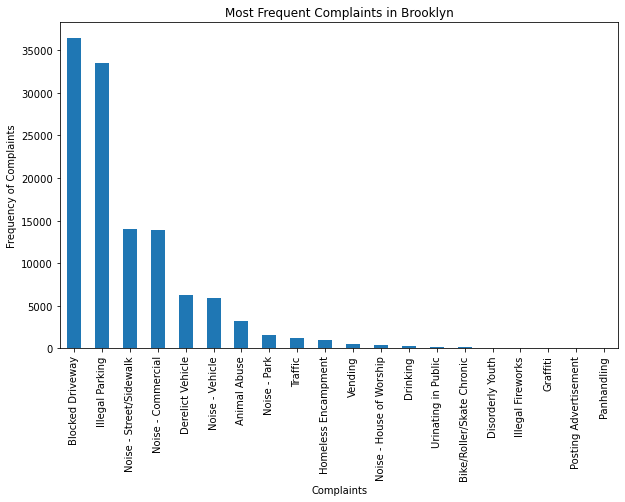

In [75]:
#visualizing complaints in Brooklyn

Brooklyn_ds['Complaint Type'].value_counts().plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn',xlabel='Complaints', ylabel='Frequency of Complaints')


##### <p style="text-align:center">Blocked Driveway and Illegal Parking are the major complaint areas in Brooklyn City</p>

<AxesSubplot:title={'center':'Complaints Concentration in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

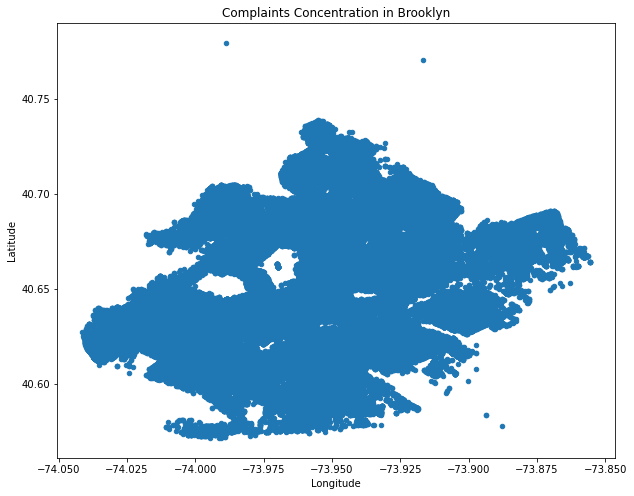

In [76]:
# 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn
# Draw scatter plot for complaint concentration across Brooklyn
Brooklyn_ds[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaints Concentration in Brooklyn', figsize = (10, 8))

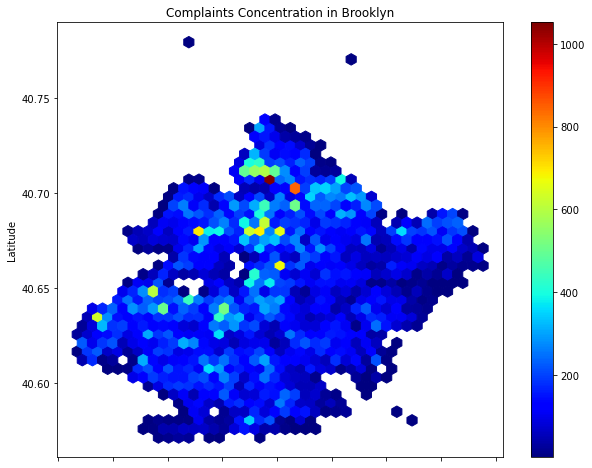

In [77]:
# Draw hexbin plot for complaint concentration across Brooklyn
Brooklyn_ds[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 8));

#### 3. Find major types of complaints:
<ul>
    <li>Plot a bar graph of count vs. complaint types</li>
    <li>Find the top 10 types of complaints</li>
    <li>Display the types of complaints in each city in a separate dataset</li>
</ul>

In [78]:
nyc_ds['Complaint Type'].unique() #Unique complaints

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

<AxesSubplot:title={'center':'Count vs Complaint Types'}, xlabel='Complaint Types', ylabel='Counts'>

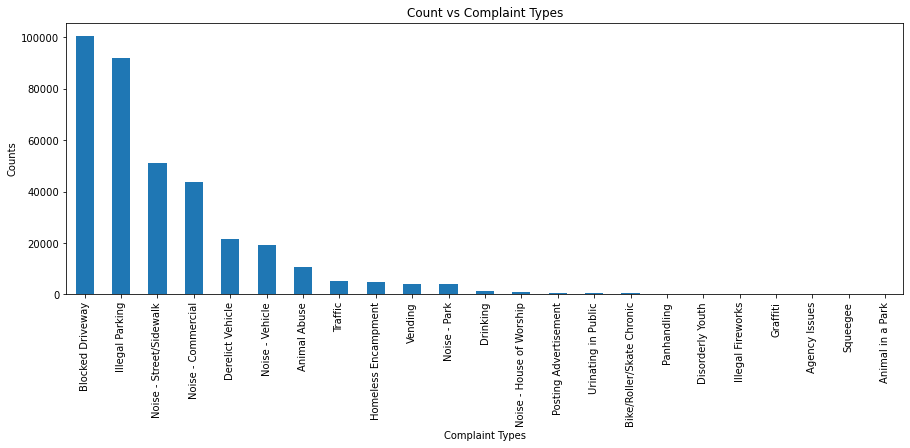

In [79]:
#Count vs Complaint Types

plt.figure(figsize=(15,5))
nyc_ds['Complaint Type'].value_counts().plot(kind='bar',title='Count vs Complaint Types', xlabel='Complaint Types', ylabel='Counts')

<p style='text-align:center'>Blocked Driveway and Illegal Parking are the major Complaints in NYC followed by Noise</p>

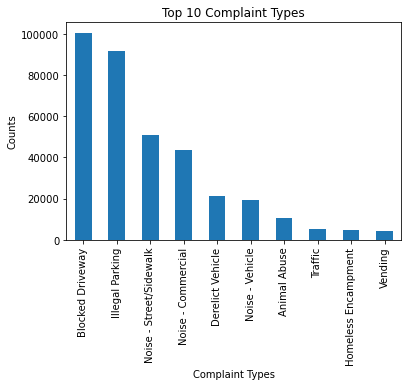

In [80]:
#Top 10 complaints

nyc_ds['Complaint Type'].value_counts().head(10).plot(kind='bar',title='Top 10 Complaint Types', xlabel='Complaint Types', ylabel='Counts')
plt.show()

In [83]:
# Create a DataFrame, df_new, which contains cities as columns and complaint types in rows
df_new = pd.crosstab(index=nyc_ds["Complaint Type"], columns=nyc_ds["City"])
df_new

City,Arverne,Astoria,Bayside,Bellerose,Breezy Point,Bronx,Brooklyn,Cambria Heights,Central Park,College Point,Corona,East Elmhurst,Elmhurst,Far Rockaway,Floral Park,...,Rego Park,Richmond Hill,Ridgewood,Rockaway Park,Rosedale,Saint Albans,South Ozone Park,South Richmond Hill,Springfield Gardens,Staten Island,Sunnyside,Unknown City,Whitestone,Woodhaven,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0
Animal Abuse,46,170,53,15,2,1971,3191,15,0,35,104,85,59,111,7,...,33,55,154,33,44,43,74,40,42,786,40,1,43,57,111
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,1,0,22,124,0,0,0,0,1,2,0,0,...,0,0,3,0,2,0,1,1,0,10,2,2,4,2,5
Blocked Driveway,50,3595,514,138,3,17062,36445,177,0,597,3597,1925,1992,383,33,...,780,1099,2161,80,270,318,1202,1946,330,2845,278,86,279,1363,2065
Derelict Vehicle,32,440,231,120,3,2402,6257,148,0,223,72,138,94,215,74,...,94,200,507,19,247,248,425,356,267,2184,17,63,279,369,306
Disorderly Youth,2,5,2,2,0,66,79,0,0,1,6,1,2,1,1,...,0,0,3,4,0,1,2,2,0,25,2,0,1,0,1
Drinking,1,43,1,1,1,206,291,0,0,1,34,9,13,4,1,...,4,10,10,23,2,3,14,25,6,188,12,3,3,4,15
Graffiti,1,4,3,0,0,15,60,0,0,2,4,3,1,0,0,...,1,1,3,0,2,0,2,0,0,6,1,0,1,0,4


In [84]:
# Gathering complaints in each city in a new dataset

city_complaint = nyc_ds.groupby(['City','Complaint Type']).size()

citywisecomplaints_ds = pd.DataFrame({'Count':city_complaint}).reset_index()

citywisecomplaints_ds.head()  

,City,Complaint Type,Count
0,Arverne,Animal Abuse,46
1,Arverne,Blocked Driveway,50
2,Arverne,Derelict Vehicle,32
3,Arverne,Disorderly Youth,2
4,Arverne,Drinking,1


### 4. Visualize the major types of complaints in each city

In [90]:
majorcity_ds=nyc_ds.groupby(['Complaint Type', 'City']).size().unstack()
majorcity_ds.head(10)

City,Arverne,Astoria,Bayside,Bellerose,Breezy Point,Bronx,Brooklyn,Cambria Heights,Central Park,College Point,Corona,East Elmhurst,Elmhurst,Far Rockaway,Floral Park,...,Rego Park,Richmond Hill,Ridgewood,Rockaway Park,Rosedale,Saint Albans,South Ozone Park,South Richmond Hill,Springfield Gardens,Staten Island,Sunnyside,Unknown City,Whitestone,Woodhaven,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
Animal Abuse,46.0,170.0,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,35.0,104.0,85.0,59.0,111.0,7.0,...,33.0,55.0,154.0,33.0,44.0,43.0,74.0,40.0,42.0,786.0,40.0,1.0,43.0,57.0,111.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,1.0,NaN,22.0,124.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,3.0,NaN,2.0,NaN,1.0,1.0,NaN,10.0,2.0,2.0,4.0,2.0,5.0
Blocked Driveway,50.0,3595.0,514.0,138.0,3.0,17062.0,36445.0,177.0,NaN,597.0,3597.0,1925.0,1992.0,383.0,33.0,...,780.0,1099.0,2161.0,80.0,270.0,318.0,1202.0,1946.0,330.0,2845.0,278.0,86.0,279.0,1363.0,2065.0
Derelict Vehicle,32.0,440.0,231.0,120.0,3.0,2402.0,6257.0,148.0,NaN,223.0,72.0,138.0,94.0,215.0,74.0,...,94.0,200.0,507.0,19.0,247.0,248.0,425.0,356.0,267.0,2184.0,17.0,63.0,279.0,369.0,306.0
Disorderly Youth,2.0,5.0,2.0,2.0,NaN,66.0,79.0,NaN,NaN,1.0,6.0,1.0,2.0,1.0,1.0,...,NaN,NaN,3.0,4.0,NaN,1.0,2.0,2.0,NaN,25.0,2.0,NaN,1.0,NaN,1.0
Drinking,1.0,43.0,1.0,1.0,1.0,206.0,291.0,NaN,NaN,1.0,34.0,9.0,13.0,4.0,1.0,...,4.0,10.0,10.0,23.0,2.0,3.0,14.0,25.0,6.0,188.0,12.0,3.0,3.0,4.0,15.0
Graffiti,1.0,4.0,3.0,NaN,NaN,15.0,60.0,NaN,NaN,2.0,4.0,3.0,1.0,NaN,NaN,...,1.0,1.0,3.0,NaN,2.0,NaN,2.0,NaN,NaN,6.0,1.0,NaN,1.0,NaN,4.0


In [91]:
nyc_ds['City'].value_counts() #Cities with maximum complaints

Brooklyn               118849
New York                77289
Bronx                   49166
Staten Island           15335
Jamaica                  8930
Astoria                  8896
Flushing                 7486
Ridgewood                6391
Corona                   5383
Woodside                 4523
East Elmhurst            3587
Ozone Park               3446
Elmhurst                 3438
South Richmond Hill      3431
Long Island City         3197
Maspeth                  3117
Woodhaven                3102
South Ozone Park         2668
Fresh Meadows            2453
Richmond Hill            2333
Middle Village           2291
Queens Village           2251
Forest Hills             2122
Jackson Heights          2105
Rego Park                1807
Bayside                  1550
College Point            1544
Far Rockaway             1397
Whitestone               1369
Hollis                   1231
Howard Beach             1145
Springfield Gardens      1094
Rosedale                 1091
Saint Alba

In [92]:
nyc_ds['City'].value_counts()[:10] #Top 10 Cities with maximum complaints

Brooklyn         118849
New York          77289
Bronx             49166
Staten Island     15335
Jamaica            8930
Astoria            8896
Flushing           7486
Ridgewood          6391
Corona             5383
Woodside           4523
Name: City, dtype: int64

In [94]:
# Lets now plot top 10 of the highest complaint types with respect to Boroughs.
top10_complaints = ['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle','Noise - Vehicle','Animal Abuse','Traffic','Homeless Encampment','Vending']
comp_borough = nyc_ds.groupby(['Borough','Complaint Type']).size().unstack()
comp_borough = comp_borough[top10_complaints]
comp_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle,Animal Abuse,Traffic,Homeless Encampment,Vending
Borough,,,,,,,,,,
BRONX,17062.0,9888.0,9142.0,2944.0,2402.0,3556.0,1971.0,429.0,274.0,433.0
BROOKLYN,36445.0,33532.0,13981.0,13855.0,6258.0,5965.0,3191.0,1260.0,948.0,575.0
MANHATTAN,2706.0,14557.0,22373.0,18696.0,694.0,6294.0,1941.0,1770.0,3063.0,2638.0
QUEENS,41481.0,27206.0,4681.0,7404.0,9917.0,3053.0,2640.0,1510.0,517.0,513.0
STATEN ISLAND,2845.0,6223.0,886.0,784.0,2184.0,424.0,786.0,227.0,77.0,25.0
Unspecified,85.0,310.0,76.0,68.0,63.0,9.0,1.0,NaN,NaN,1.0


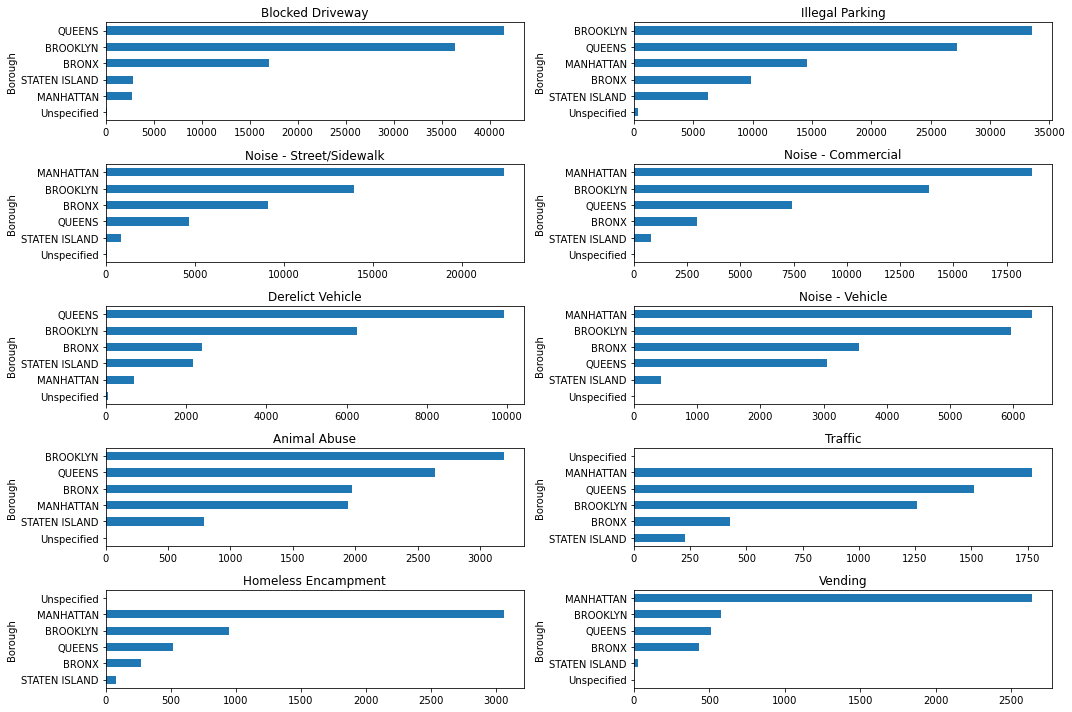

In [96]:
col_number = 2
row_number = 5
fig, axes = plt.subplots(row_number,col_number, figsize=(15,10))

for i, (label,col) in enumerate(comp_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

<div style="margin:auto; width:500px">
<ul>
    <li>Manhattan is making most of the noise</li>
    <li>Brooklyn has the most number of 'Illegal parking' and 'Animal Abuse'</li>
    <li>Queens has highest complaints for 'Blocked Driveway'</li>
</ul>
    </div>

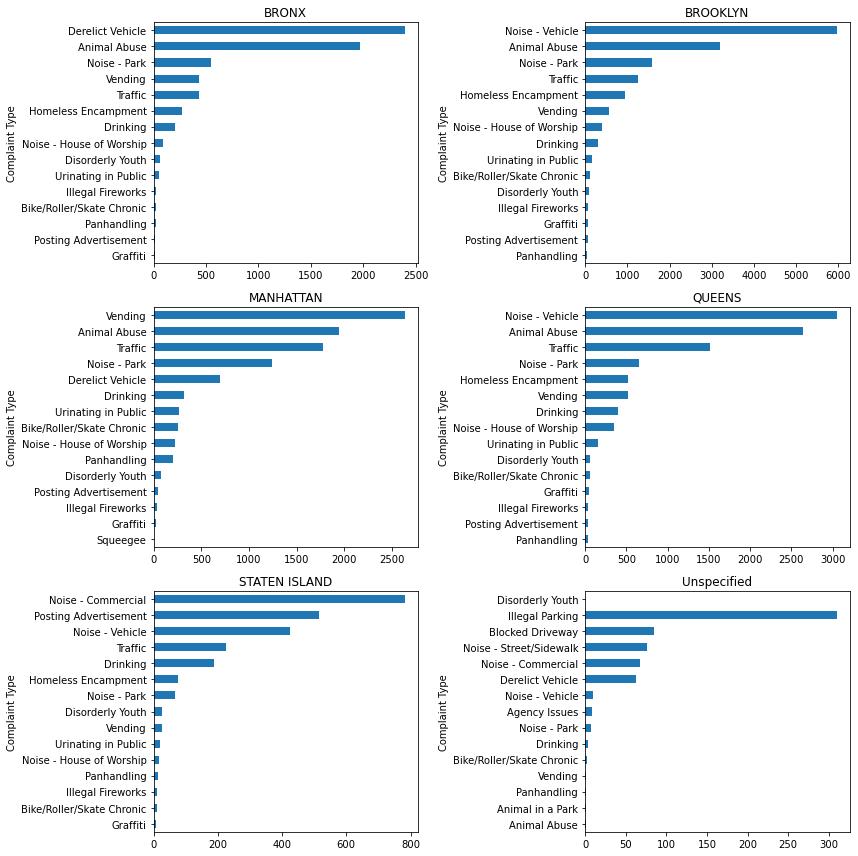

In [98]:
# Visualization of most Complaints per Borough
borough_comp = nyc_ds.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

<AxesSubplot:>

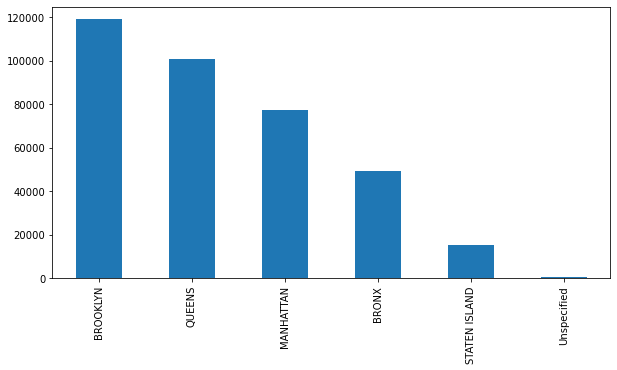

In [99]:
nyc_ds['Borough'].value_counts().plot(kind='bar',figsize=(10,5)) # Boroughwise complain

<p style="text-align: center">Brooklyn got the hight complain</p>

### City Wise

In [101]:
citycomp = nyc_ds.groupby(['Complaint Type', 'City']).size().unstack()
citycomp.head()

City,Arverne,Astoria,Bayside,Bellerose,Breezy Point,Bronx,Brooklyn,Cambria Heights,Central Park,College Point,Corona,East Elmhurst,Elmhurst,Far Rockaway,Floral Park,...,Rego Park,Richmond Hill,Ridgewood,Rockaway Park,Rosedale,Saint Albans,South Ozone Park,South Richmond Hill,Springfield Gardens,Staten Island,Sunnyside,Unknown City,Whitestone,Woodhaven,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
Animal Abuse,46.0,170.0,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,35.0,104.0,85.0,59.0,111.0,7.0,...,33.0,55.0,154.0,33.0,44.0,43.0,74.0,40.0,42.0,786.0,40.0,1.0,43.0,57.0,111.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,1.0,NaN,22.0,124.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,3.0,NaN,2.0,NaN,1.0,1.0,NaN,10.0,2.0,2.0,4.0,2.0,5.0
Blocked Driveway,50.0,3595.0,514.0,138.0,3.0,17062.0,36445.0,177.0,NaN,597.0,3597.0,1925.0,1992.0,383.0,33.0,...,780.0,1099.0,2161.0,80.0,270.0,318.0,1202.0,1946.0,330.0,2845.0,278.0,86.0,279.0,1363.0,2065.0


In [102]:
temp = nyc_ds['City'].value_counts()   #Top Cities with maximum complaints
temp[:10]

Brooklyn         118849
New York          77289
Bronx             49166
Staten Island     15335
Jamaica            8930
Astoria            8896
Flushing           7486
Ridgewood          6391
Corona             5383
Woodside           4523
Name: City, dtype: int64

In [103]:
temp[:10].keys()

Index(['Brooklyn', 'New York', 'Bronx', 'Staten Island', 'Jamaica', 'Astoria',
       'Flushing', 'Ridgewood', 'Corona', 'Woodside'],
      dtype='object')

In [104]:
# Top 10 complaint cities
top10_complaints_city = citycomp[['Brooklyn', 'New York', 'Bronx', 'Staten Island', 'Jamaica', 'Astoria',
       'Flushing', 'Ridgewood', 'Corona', 'Woodside']]
top10_complaints_city

City,Brooklyn,New York,Bronx,Staten Island,Jamaica,Astoria,Flushing,Ridgewood,Corona,Woodside
Complaint Type,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animal Abuse,3191.0,1941.0,1971.0,786.0,317.0,170.0,191.0,154.0,104.0,111.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,124.0,254.0,22.0,10.0,3.0,16.0,3.0,3.0,NaN,5.0
Blocked Driveway,36445.0,2705.0,17062.0,2845.0,3620.0,3595.0,3640.0,2161.0,3597.0,2065.0
Derelict Vehicle,6257.0,695.0,2402.0,2184.0,1132.0,440.0,532.0,507.0,72.0,306.0
Disorderly Youth,79.0,81.0,66.0,25.0,9.0,5.0,2.0,3.0,6.0,1.0
Drinking,291.0,321.0,206.0,188.0,40.0,43.0,47.0,10.0,34.0,15.0
Graffiti,60.0,25.0,15.0,6.0,3.0,4.0,6.0,3.0,4.0,4.0


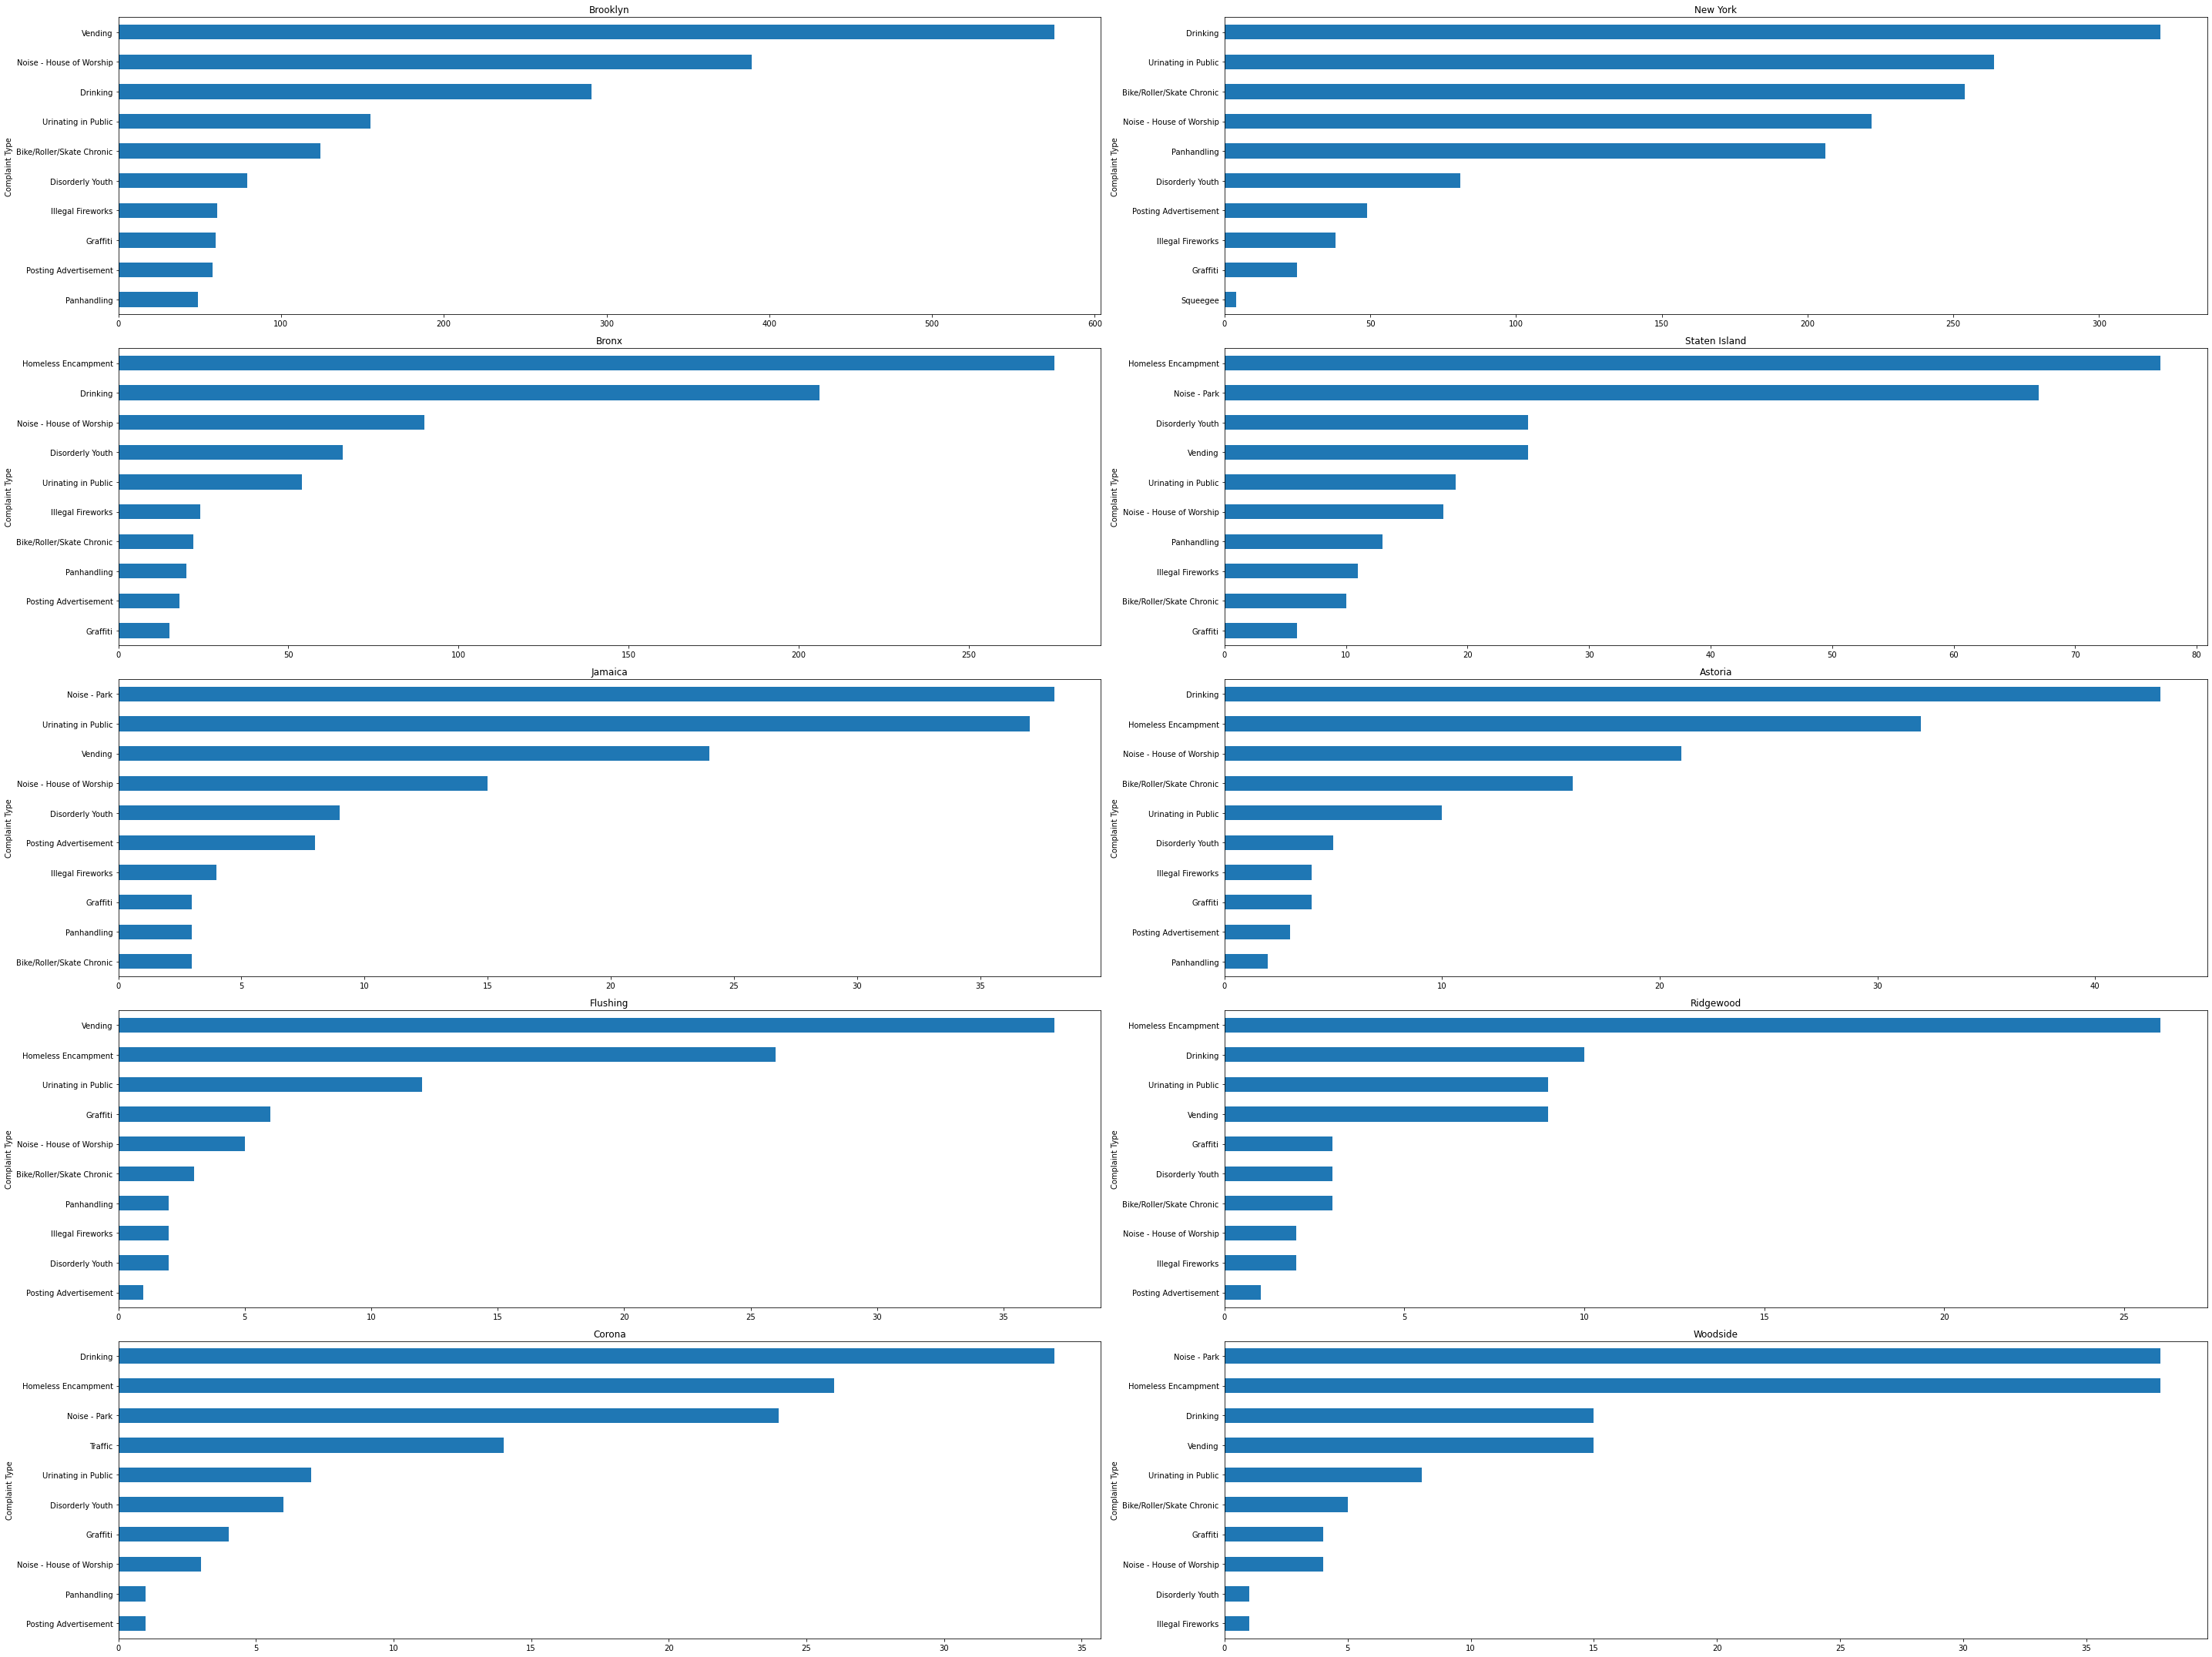

In [107]:
col_number = 2
row_number = 5
fig, axes = plt.subplots(row_number,col_number, figsize=(40,30))

for d, (label,col) in enumerate(top10_complaints_city.iteritems()):
    ax = axes[int(d/col_number), d%col_number]
    col = col.sort_values(ascending=True)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

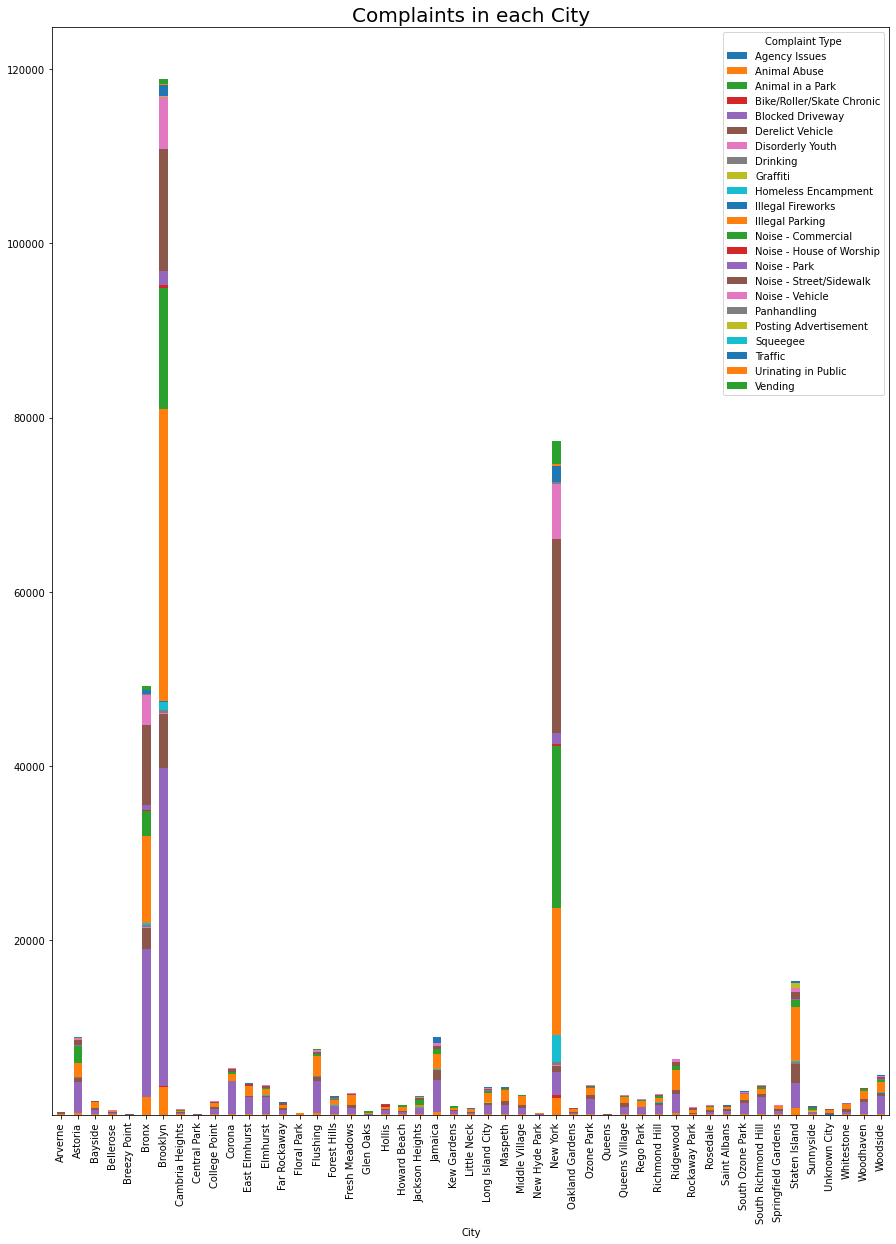

In [110]:
#Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints
complaints_per_city = pd.crosstab(index=nyc_ds["City"], columns=nyc_ds["Complaint Type"])
#complaints_per_city
complaints_per_city.plot(kind="bar", figsize=(15,20),stacked=True)
plt.title('Complaints in each City',fontsize=20)
plt.show()

#### 5. Check if the average response time across various types of complaints

In [109]:
nyc_ds.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Time Elapsed,Time Elapsed in Seconds
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,New York,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,3360.0
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,Astoria,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,5220.0
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,Bronx,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,17520.0
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,Bronx,Closed,1/1/2016 7:57,The Police Department responded to the complai...,1/1/2016 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,27960.0
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,Elmhurst,Closed,1/1/2016 7:56,The Police Department responded and upon arriv...,1/1/2016 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,12480.0


##### 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [113]:
#Convert the object type to datetime datatype
#nyc_ds['Created Date'] = pd.to_datetime(nyc_ds['Created Date'])
#nyc_ds['Closed Date'] = pd.to_datetime(nyc_ds['Closed Date'])
nyc_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      362177 non-null  int64          
 1   Created Date                    362177 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          362177 non-null  object         
 4   Agency Name                     362177 non-null  object         
 5   Complaint Type                  362177 non-null  object         
 6   Descriptor                      355681 non-null  object         
 7   Location Type                   362047 non-null  object         
 8   Incident Zip                    361502 non-null  float64        
 9   Incident Address                310491 non-null  object         
 10  Street Name                     310491 non-n

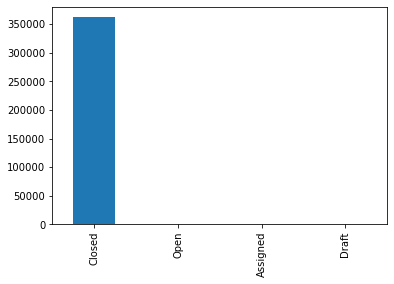

In [114]:
# checking the status of tickets
nyc_ds['Status'].value_counts().plot(kind='bar')
plt.show()

<p style="text-align:center">Tickets are closed</p>

In [115]:
# Find request closing time
nyc_ds["Request Closing Time"] = nyc_ds["Closed Date"] - nyc_ds["Created Date"]

nyc_ds['Request Closing Hours'] = nyc_ds['Request Closing Time'].astype('timedelta64[h]')+1    #calculating hours
nyc_ds[['Request Closing Time','Request Closing Hours']].head(10)

,Request Closing Time,Request Closing Hours
0,0 days 00:56:00,1.0
1,0 days 01:27:00,2.0
2,0 days 04:52:00,5.0
3,0 days 07:46:00,8.0
4,0 days 03:28:00,4.0
5,0 days 01:54:00,2.0
6,0 days 01:58:00,2.0
7,0 days 01:48:00,2.0
8,0 days 08:34:00,9.0
9,0 days 01:24:00,2.0


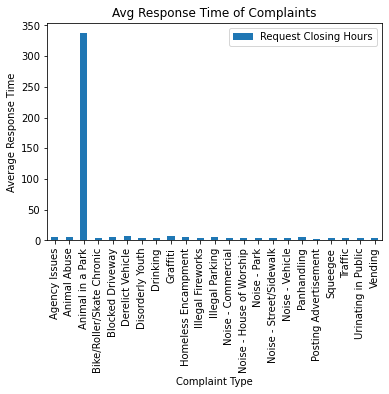

In [116]:
# Average Response Time
Resolution = nyc_ds.groupby(['Complaint Type'])[['Request Closing Hours']].mean()

Resolution.plot(kind='bar',title='Avg Response Time of Complaints', xlabel='Complaint Type', ylabel='Average Response Time')
plt.show()

<p style="text-align: center">'Animal in a Park' takes longer time</p>

<p style="text-align:right; margin-top:15px;"><b>Md Latif</b><br/>latif127@yahoo.com</p>